## 计算节点特征

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号, 注意['SimHei']对应这句不行.

可视化辅助函数

In [2]:
def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    # plt.figure(figsize=(10, 8))
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

导入无向图(空手道俱乐部)

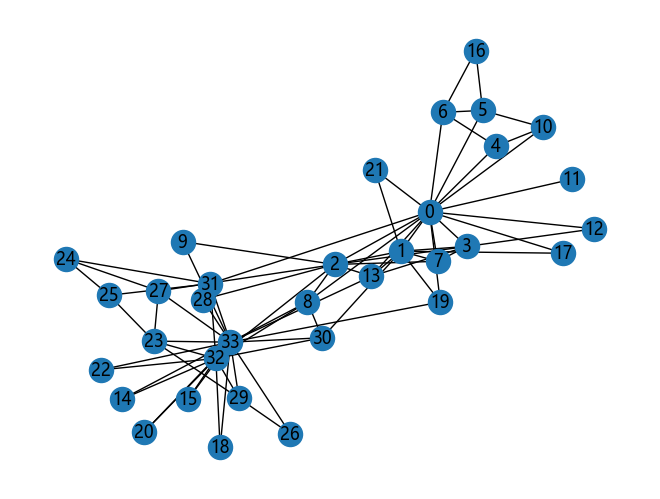

In [3]:
G = nx.karate_club_graph()

pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos,with_labels=True)

导入有向图

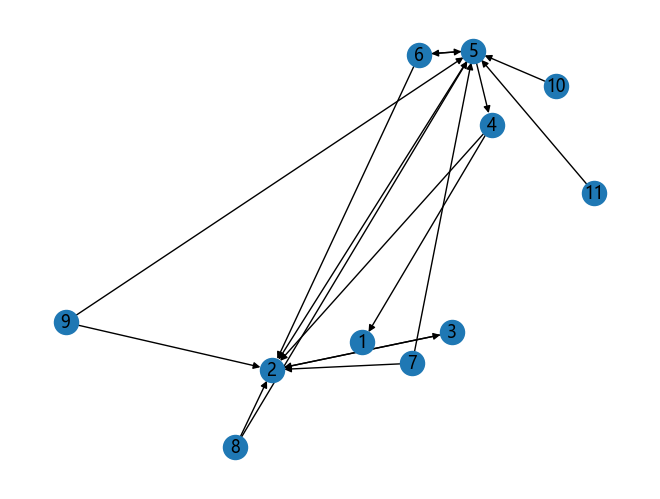

In [4]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])

nx.draw(DiG, pos, with_labels=True)

### Node Degree

In [5]:
list(nx.degree(G))

[(0, 16),
 (1, 9),
 (2, 10),
 (3, 6),
 (4, 3),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 2),
 (10, 3),
 (11, 1),
 (12, 2),
 (13, 5),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (19, 3),
 (20, 2),
 (21, 2),
 (22, 2),
 (23, 5),
 (24, 3),
 (25, 3),
 (26, 2),
 (27, 4),
 (28, 3),
 (29, 4),
 (30, 4),
 (31, 6),
 (32, 12),
 (33, 17)]

In [6]:
dict(G.degree())

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [7]:
# 字典按值排序
sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5),
 (5, 4),
 (6, 4),
 (7, 4),
 (27, 4),
 (29, 4),
 (30, 4),
 (4, 3),
 (10, 3),
 (19, 3),
 (24, 3),
 (25, 3),
 (28, 3),
 (9, 2),
 (12, 2),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (20, 2),
 (21, 2),
 (22, 2),
 (26, 2),
 (11, 1)]

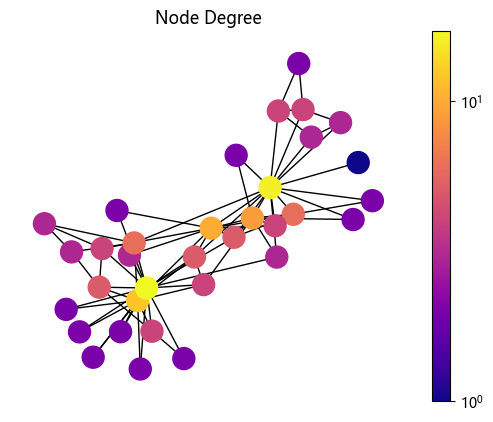

In [8]:
draw(G, pos, dict(G.degree()), 'Node Degree')

NetworkX文档: 节点重要度文档Centrality
https://networkx.org/documentation/stable/reference/algorithms/centrality.html

### Degree Centrality-无向图

In [9]:
nx.degree_centrality(G)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

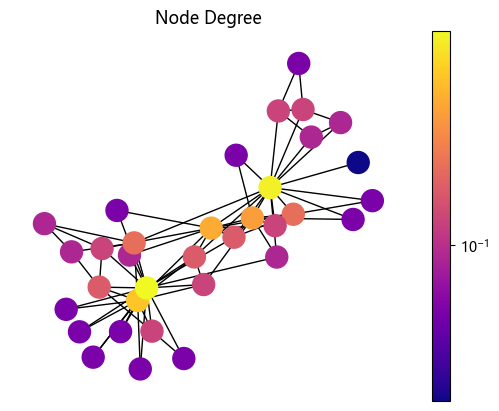

In [10]:
draw(G, pos, nx.degree_centrality(G), 'Node Degree')

### Degree Centrality-有向图

In [11]:
nx.in_degree_centrality(DiG)

{2: 0.7000000000000001,
 3: 0.1,
 4: 0.1,
 1: 0.1,
 5: 0.6000000000000001,
 6: 0.1,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0}

In [12]:
nx.out_degree_centrality(DiG)

{2: 0.1,
 3: 0.1,
 4: 0.2,
 1: 0.0,
 5: 0.30000000000000004,
 6: 0.2,
 7: 0.2,
 8: 0.2,
 9: 0.2,
 10: 0.1,
 11: 0.1}

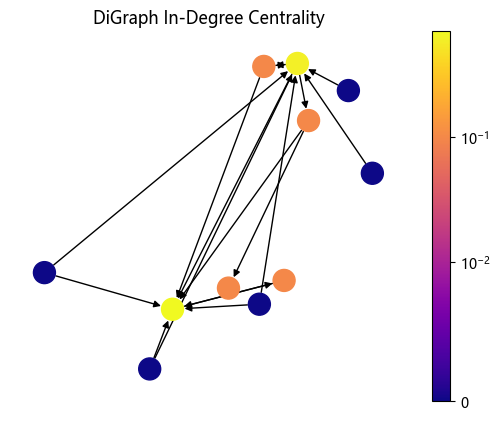

In [13]:
draw(DiG, pos, nx.in_degree_centrality(DiG), 'DiGraph In-Degree Centrality')

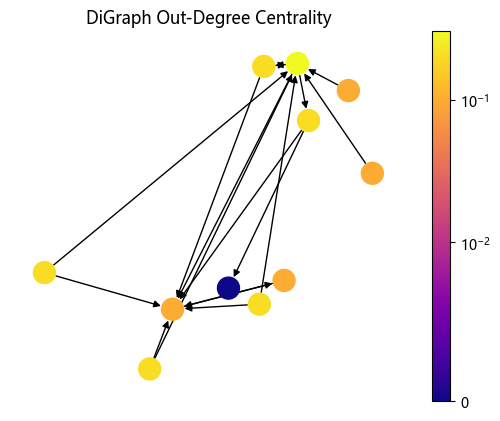

In [14]:
draw(DiG, pos, nx.out_degree_centrality(DiG), 'DiGraph Out-Degree Centrality')

### Eigenvector Centrality-无向图

In [15]:
nx.eigenvector_centrality(G)

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.3171893899684447,
 3: 0.21117407832057059,
 4: 0.0759664588165738,
 5: 0.07948057788594245,
 6: 0.07948057788594245,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637756,
 10: 0.0759664588165738,
 11: 0.052854169452336466,
 12: 0.08425192086558085,
 13: 0.22646969838808145,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.02363479426059687,
 17: 0.09239675666845952,
 18: 0.10140627846270832,
 19: 0.14791134007618664,
 20: 0.10140627846270832,
 21: 0.09239675666845952,
 22: 0.10140627846270832,
 23: 0.15012328691726784,
 24: 0.05705373563802805,
 25: 0.059208202502790096,
 26: 0.07558192219009324,
 27: 0.13347932684333305,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.191036269797917,
 32: 0.30865104773369595,
 33: 0.373371213013235}

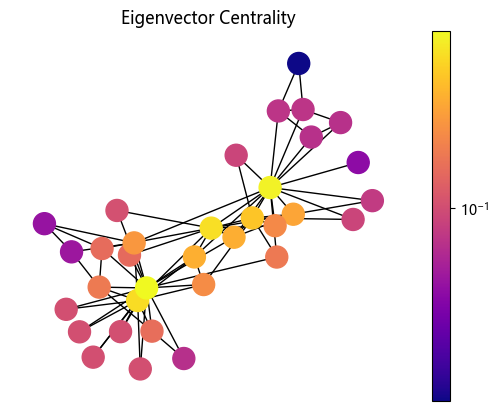

In [16]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

### Eigenvector Centrality-有向图

In [17]:
nx.eigenvector_centrality_numpy(DiG)

{2: 0.7071067871666155,
 3: 0.7071067752064792,
 4: 7.973423921114883e-09,
 1: 7.973424032137185e-09,
 5: 7.973423712948066e-09,
 6: 7.973423865603732e-09,
 7: -0.0,
 8: -0.0,
 9: 2.77555756156289e-17,
 10: -0.0,
 11: 5.55111512312578e-17}

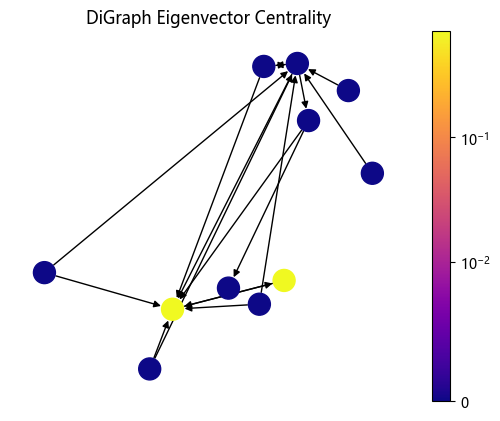

In [18]:
draw(DiG, pos, nx.eigenvector_centrality_numpy(DiG), 'DiGraph Eigenvector Centrality')

## Betweenness Centrality（必经之地）

In [19]:
nx.betweenness_centrality?

In [20]:
nx.betweenness_centrality??

In [21]:
nx.betweenness_centrality(G)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

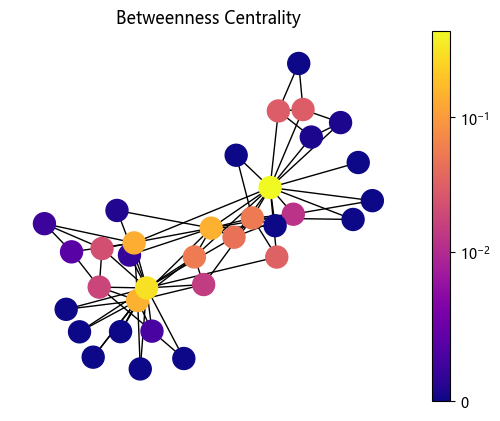

In [22]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

### Closeness Centrality（去哪儿都近）

In [23]:
nx.closeness_centrality(G)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

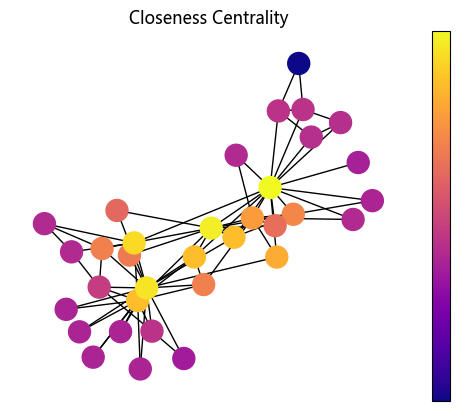

In [24]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

### PageRank

In [25]:
nx.pagerank(DiG, alpha=0.85)

{2: 0.38439863456604384,
 3: 0.3429125997558898,
 4: 0.039087092099966095,
 1: 0.03278149315934399,
 5: 0.08088569323449774,
 6: 0.039087092099966095,
 7: 0.016169479016858404,
 8: 0.016169479016858404,
 9: 0.016169479016858404,
 10: 0.016169479016858404,
 11: 0.016169479016858404}

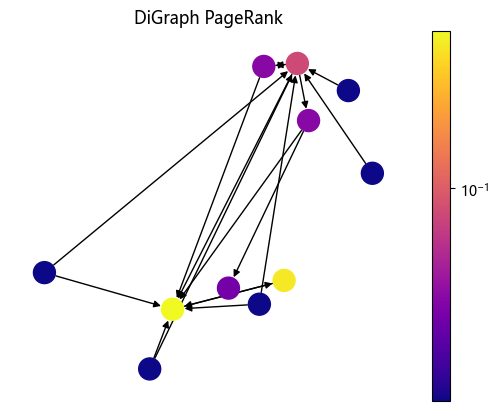

In [26]:
draw(DiG, pos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')

### Katz Centrality

In [27]:
nx.katz_centrality(G, alpha=0.1, beta=1.0)

{0: 0.32132459695923254,
 1: 0.23548425319449465,
 2: 0.26576588481542884,
 3: 0.19491320249172545,
 4: 0.12190440564948415,
 5: 0.13097227932864922,
 6: 0.13097227932864922,
 7: 0.16623305202689406,
 8: 0.20071781096610813,
 9: 0.12420150029869699,
 10: 0.12190440564948415,
 11: 0.09661674181730144,
 12: 0.11610805572826274,
 13: 0.19937368057318852,
 14: 0.12513342642033798,
 15: 0.12513342642033798,
 16: 0.09067874388549632,
 17: 0.12016515915440101,
 18: 0.12513342642033798,
 19: 0.15330578770069545,
 20: 0.12513342642033798,
 21: 0.12016515915440101,
 22: 0.12513342642033798,
 23: 0.1667906480987158,
 24: 0.11021106930146939,
 25: 0.11156461274962844,
 26: 0.11293552094158045,
 27: 0.15190166582081863,
 28: 0.14358165473533302,
 29: 0.1531060365504152,
 30: 0.16875361802889588,
 31: 0.1938016017020055,
 32: 0.27508514346623925,
 33: 0.33140639752189366}

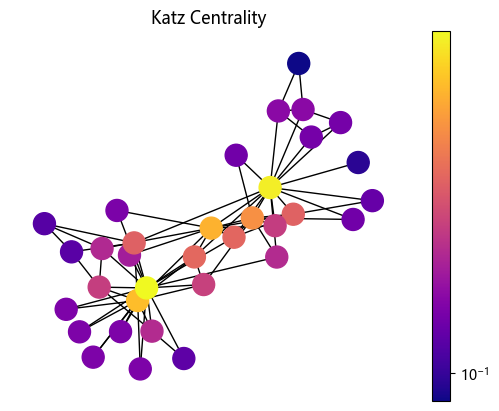

In [28]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')

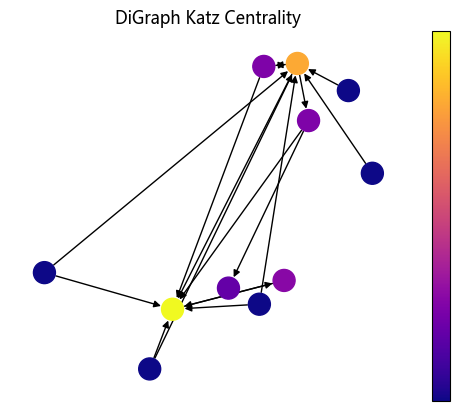

In [29]:
draw(DiG, pos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiGraph Katz Centrality')

### HITS Hubs and Authorities

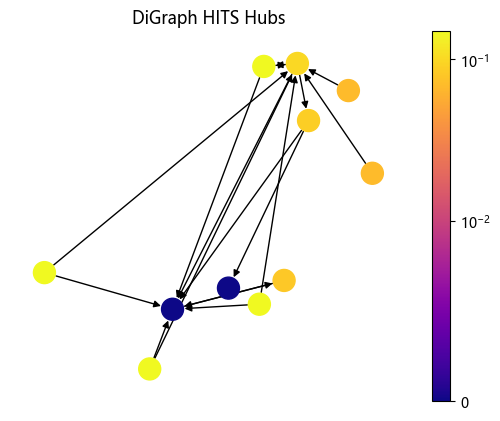

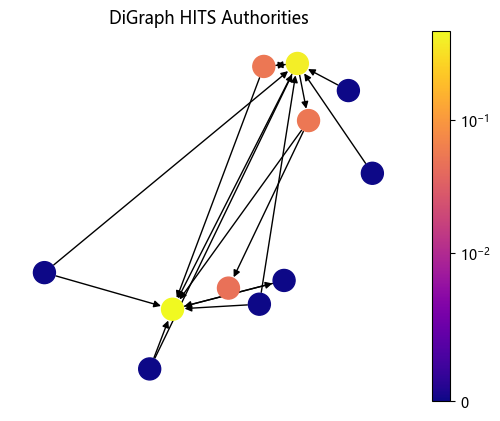

In [30]:
h, a = nx.hits(DiG)
draw(DiG, pos, h, 'DiGraph HITS Hubs')
draw(DiG, pos, a, 'DiGraph HITS Authorities')

### 社群属性 Clustering
https://networkx.org/documentation/stable/reference/algorithms/clustering.html

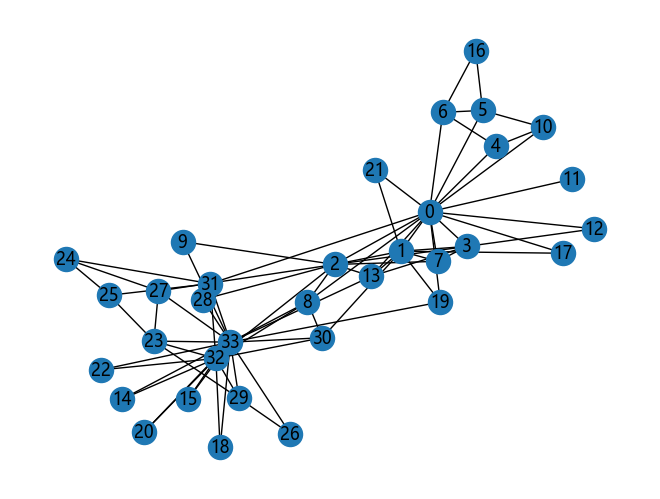

In [31]:
nx.draw(G, pos, with_labels=True)

三角形个数

In [32]:
nx.triangles(G)

{0: 18,
 1: 12,
 2: 11,
 3: 10,
 4: 2,
 5: 3,
 6: 3,
 7: 6,
 8: 5,
 9: 0,
 10: 2,
 11: 0,
 12: 1,
 13: 6,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 4,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 4,
 30: 3,
 31: 3,
 32: 13,
 33: 15}

In [33]:
nx.triangles(G, 0)

18

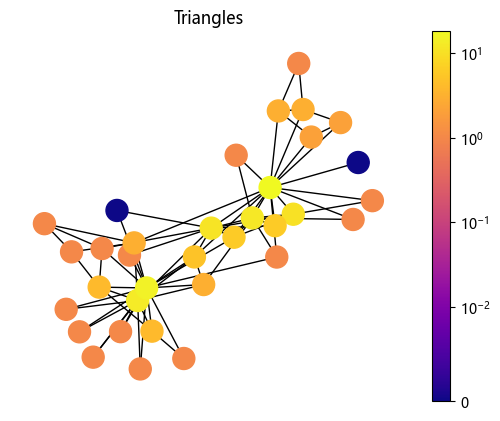

In [34]:
draw(G, pos, nx.triangles(G), 'Triangles')

Clustering Coefficient

In [35]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [36]:
nx.clustering(G, 0)

0.15

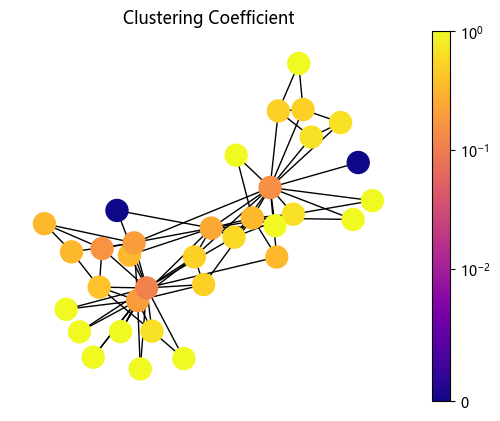

In [37]:
draw(G, pos, nx.clustering(G), 'Clustering Coefficient')

### Bridges

如果某个连接断掉，会使连通域个数增加，则该连接是bridge。
bridge连接不属于环的一部分。

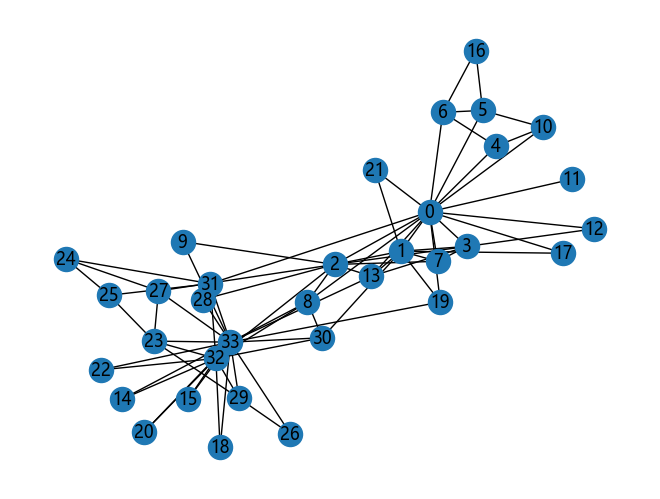

In [38]:
pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos, with_labels=True)

In [39]:
list(nx.bridges(G))

[(0, 11)]

### Common Neighbors 、Jaccard Coefficient和Adamic-Adar index

基于两节点局部连接信息（Local neighborhood overlap）

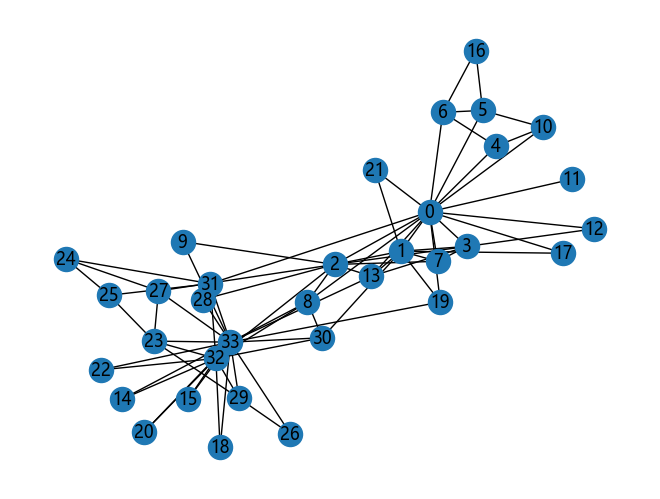

In [40]:
pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos, with_labels=True)

In [41]:
sorted(nx.common_neighbors(G, 0, 4))

[6, 10]

In [42]:
preds = nx.jaccard_coefficient(G, [(0, 1), (2, 3)])
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

(0, 1) -> 0.38888889
(2, 3) -> 0.33333333


In [43]:
for u, v, p in nx.adamic_adar_index(G, [(0, 1), (2, 3)]):
    print(f"({u}, {v}) -> {p:.8f}")

(0, 1) -> 6.13071687
(2, 3) -> 2.15847583


### Katz Index

基于两节点在全图的连接信息（Global neighborhood overlap）
节点u到节点v，路径为k的路径个数。

In [44]:
import networkx as nx
import numpy as np
from numpy.linalg import inv
import warnings

warnings.filterwarnings("ignore")

G = nx.karate_club_graph()

In [45]:
len(G.nodes)

34

In [46]:
# 计算主特征向量
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
print('最大特征值', max(e))

# 折减系数
beta = 1/max(e)

# 创建单位矩阵
I = np.identity(len(G.nodes))

# 计算 Katz Index
S = inv(I - nx.to_numpy_array(G)*beta) - I

最大特征值 1.6922391863667476


In [47]:
S.shape

(34, 34)

In [48]:
S


array([[-0.88464927, -0.35661551,  0.09098041, ...,  0.0401081 ,
        -0.07978327,  0.04209948],
       [-0.35661551, -1.55286914,  0.39139514, ...,  0.2858734 ,
        -0.26902833,  0.16729019],
       [ 0.09098041,  0.39139514, -1.16899972, ..., -0.15910606,
         0.28424098, -0.07913156],
       ...,
       [ 0.0401081 ,  0.2858734 , -0.15910606, ..., -1.33756667,
         0.28532693, -0.21595469],
       [-0.07978327, -0.26902833,  0.28424098, ...,  0.28532693,
        -1.37420677,  0.2804895 ],
       [ 0.04209948,  0.16729019, -0.07913156, ..., -0.21595469,
         0.2804895 , -1.30865498]])